In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression


In [59]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [60]:
df = pd.read_excel(r'/content/Task_students_performance_dataset.xlsx', sheet_name=0)
print(f"✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(df['Study_Hours_per_Week'].min(), df['Study_Hours_per_Week'].max())


✓ Dataset loaded successfully!
Dataset shape: (300, 20)
0.2024633538487475 39.62020568002693


In [61]:
print("\n📊 Student Overview:")
df.head()


📊 Student Overview:


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [62]:
print("\n📈 Student Info:")
print(df.info())


📈 Student Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      3

In [63]:
print(f"\n🔍 Missing values: {df.isnull().sum()}")


🔍 Missing values: Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64


In [64]:
df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')

In [65]:
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Week_of_Year'] = df['Date'].dt.isocalendar().week.astype(int)
df['Quarter'] = df['Date'].dt.quarter

In [66]:
df.head(11)

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,...,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score,Date,Day_of_Year,Week_of_Year,Quarter
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,...,4.526416,1.698767,Good,9.416549,4,44.293533,2024-01-01,1,1,1
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,...,5.920305,8.459841,Excellent,4.382245,4,42.749974,2024-01-02,2,1,1
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,...,5.788195,4.140011,Excellent,7.373097,5,29.846049,2024-01-03,3,1,1
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,...,6.313880,5.694395,Good,5.281190,6,44.030395,2024-01-04,4,1,1
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,...,1.551979,8.150371,Poor,7.069597,6,42.548877,2024-01-05,5,1,1
5,S1005,Female,9.682211,69.557506,85.581763,Postgraduate,No,58016.073277,Yes,Yes,...,4.259586,8.959389,Good,7.866040,0,45.834753,2024-01-06,6,1,1
6,S1006,Male,26.885422,40.681219,73.405093,Postgraduate,Yes,80361.129686,Yes,Yes,...,7.508154,4.103033,Good,1.409073,1,40.899921,2024-01-07,7,1,1
7,S1007,Male,30.464785,68.119639,67.342276,Graduate,Yes,73484.703470,No,Yes,...,2.805042,5.156591,Excellent,6.819404,8,43.066166,2024-01-08,8,2,1
8,S1008,Male,9.505502,43.378197,92.572481,High School,No,50173.178186,No,No,...,2.832205,4.730645,Poor,3.040671,9,34.788766,2024-01-09,9,2,1
9,S1009,Female,29.128654,47.129075,85.201805,Graduate,No,87779.455991,No,Yes,...,1.090815,1.119259,Average,7.030293,1,50.811575,2024-01-10,10,2,1


In [67]:
le = LabelEncoder()

df['Gender_Encoded'] = le.fit_transform(df['Gender'])
df['School_Type_Encoded']=le.fit_transform(df['School_Type'])
df['Parental_Education_encoded'] = le.fit_transform(df['Parental_Education'])
df['Tutoring_Classes'] = le.fit_transform(df['Tutoring_Classes'])
df['Sports_Activity'] = le.fit_transform(df['Sports_Activity'])
df['Extra_Curricular'] = le.fit_transform(df['Extra_Curricular'])
df['Teacher_Feedback'] = le.fit_transform(df['Teacher_Feedback'])
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,...,Motivation_Level,Library_Usage_per_Week,Final_Score,Date,Day_of_Year,Week_of_Year,Quarter,Gender_Encoded,School_Type_Encoded,Parental_Education_encoded
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,0,1,...,9.416549,4,44.293533,2024-01-01,1,1,1,1,0,2
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,0,1,...,4.382245,4,42.749974,2024-01-02,2,1,1,0,0,1
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,0,0,...,7.373097,5,29.846049,2024-01-03,3,1,1,1,0,1
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,0,0,...,5.281190,6,44.030395,2024-01-04,4,1,1,1,0,0
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,0,0,...,7.069597,6,42.548877,2024-01-05,5,1,1,1,0,2


In [68]:
exclude_cols = ['Gender','Attendance_Percentage','Parental_Education','Family_Income','Sports_Activity','Gender_Encoded']


In [69]:

initial_feature_candidates = [c for c in df.columns if c not in exclude_cols]
feature_cols = [c for c in initial_feature_candidates if c != 'Final_Score']
X = df[feature_cols].copy()
y = df['Final_Score']

In [70]:
print(f"✓ Features selected: {len(feature_cols)} columns")
print(f"✓ Target variable: Final_Score")

✓ Features selected: 20 columns
✓ Target variable: Final_Score


In [71]:
feature_cols

['Student_ID',
 'Study_Hours_per_Week',
 'Previous_Sem_Score',
 'Internet_Access',
 'Tutoring_Classes',
 'Extra_Curricular',
 'School_Type',
 'Sleep_Hours',
 'Travel_Time',
 'Test_Anxiety_Level',
 'Peer_Influence',
 'Teacher_Feedback',
 'Motivation_Level',
 'Library_Usage_per_Week',
 'Date',
 'Day_of_Year',
 'Week_of_Year',
 'Quarter',
 'School_Type_Encoded',
 'Parental_Education_encoded']

In [72]:
print("\n📋 Features used in model:")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")


📋 Features used in model:
 1. Student_ID
 2. Study_Hours_per_Week
 3. Previous_Sem_Score
 4. Internet_Access
 5. Tutoring_Classes
 6. Extra_Curricular
 7. School_Type
 8. Sleep_Hours
 9. Travel_Time
10. Test_Anxiety_Level
11. Peer_Influence
12. Teacher_Feedback
13. Motivation_Level
14. Library_Usage_per_Week
15. Date
16. Day_of_Year
17. Week_of_Year
18. Quarter
19. School_Type_Encoded
20. Parental_Education_encoded


In [73]:
# Basic statistics
print("\nTarget Variable (Final_Score) Statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")
print(f"Std Dev: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")


Target Variable (Final_Score) Statistics:
Mean: 41.45
Median: 41.60
Std Dev: 9.99
Min: 17.92
Max: 67.30


In [74]:
print("\n📌 Top 10 Features Correlated with Final Score:")
# Numeric columns only
numeric_df = df.select_dtypes(include='number')
correlations = numeric_df.corr()['Final_Score'].sort_values(ascending=False)
print(correlations.head(11)[1:])



📌 Top 10 Features Correlated with Final Score:
Previous_Sem_Score       0.632940
Study_Hours_per_Week     0.464599
Attendance_Percentage    0.335473
Family_Income            0.090093
Teacher_Feedback         0.079710
Extra_Curricular         0.025958
Sleep_Hours              0.021040
School_Type_Encoded      0.001950
Gender_Encoded          -0.005002
Week_of_Year            -0.016974
Name: Final_Score, dtype: float64


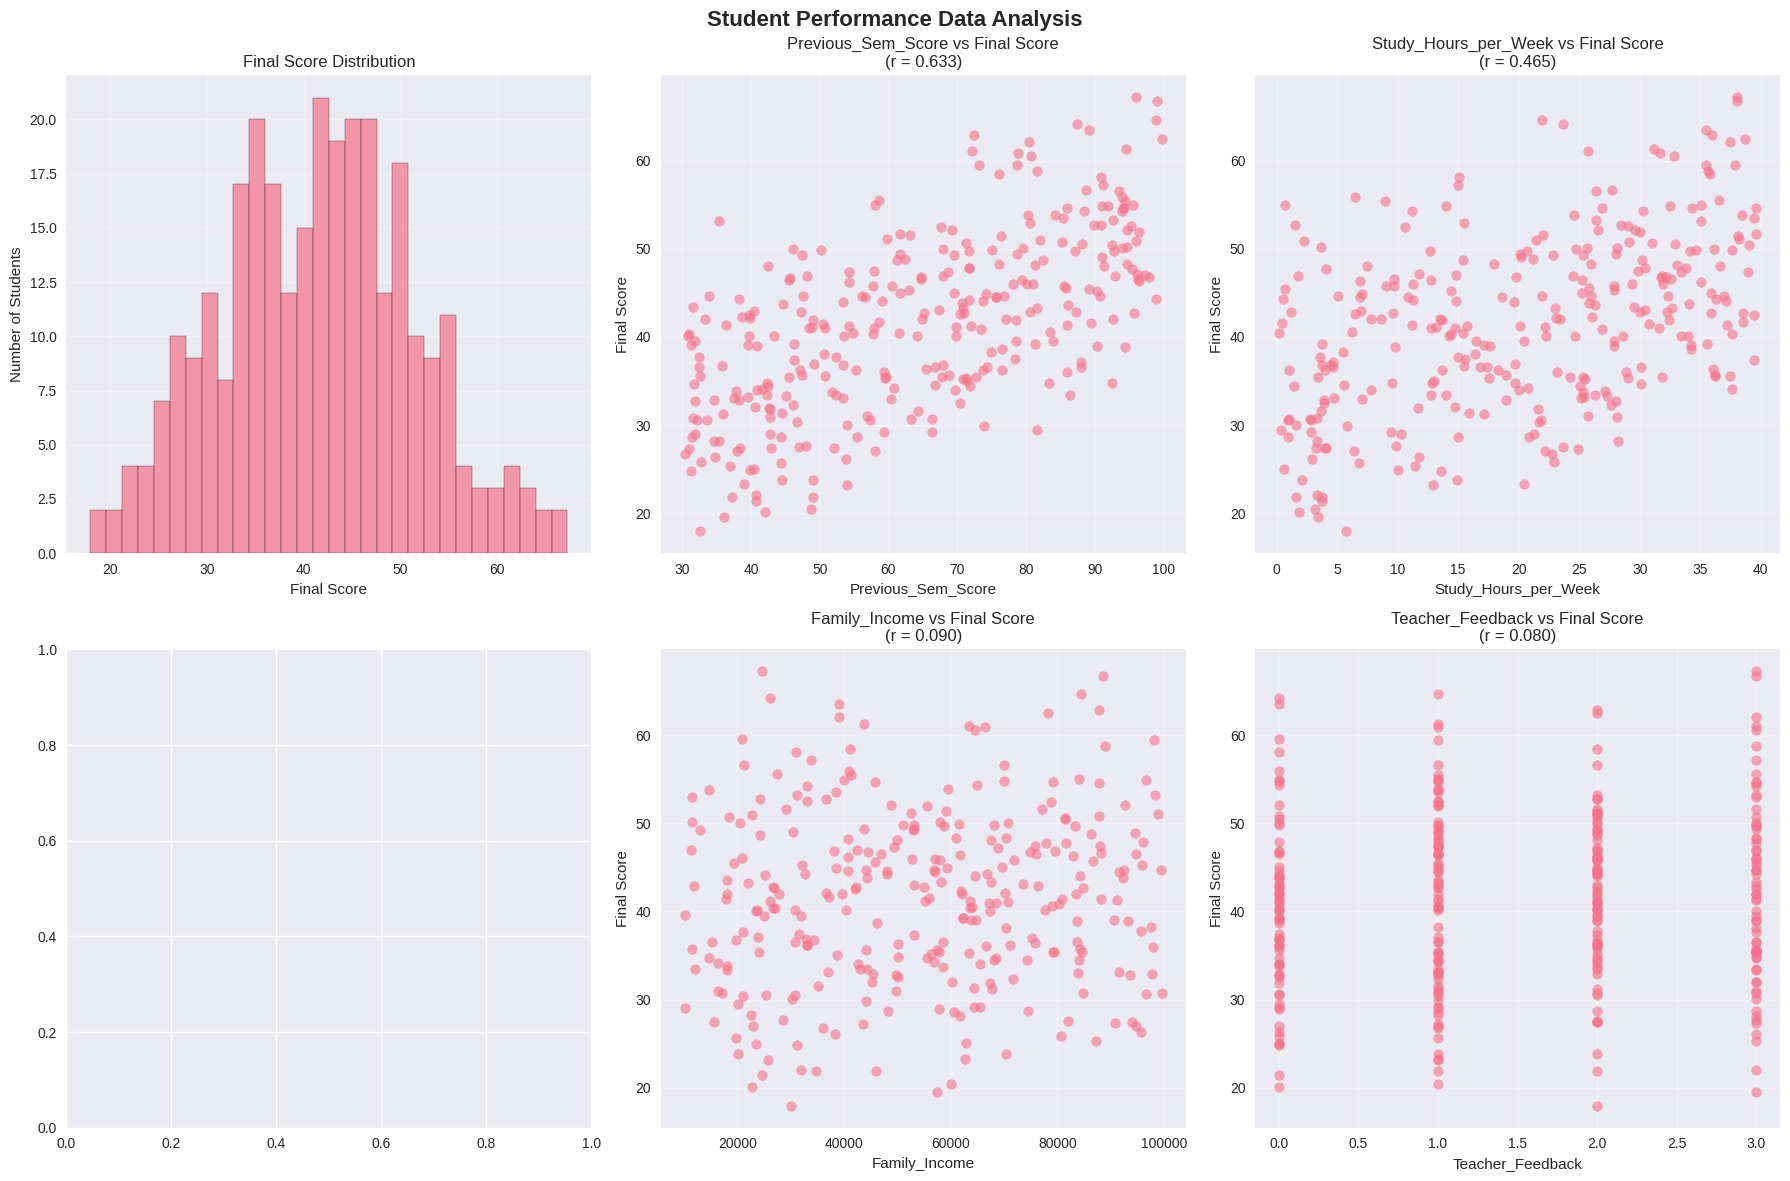

In [75]:
# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Student Performance Data Analysis', fontsize=16, fontweight='bold')

# Final Score distribution
axes[0, 0].hist(y, bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Final Score Distribution')
axes[0, 0].set_xlabel('Final Score')
axes[0, 0].set_ylabel('Number of Students')
axes[0, 0].grid(True, alpha=0.3)

top_features = correlations.head(6)[1:].index   # Top 5 excluding Final_Score itself
for i, feature in enumerate(top_features):
    if i < 5:
        row = i // 3
        col = (i + 1) % 3

        if row == 0 and col == 0:
            continue  # First plot already used (hist)

        axes[row, col].scatter(df[feature], y, alpha=0.6)
        axes[row, col].set_title(f'{feature} vs Final Score\n(r = {correlations[feature]:.3f})')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Final Score')
        axes[row, col].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




🔗 Top 10 Features for Heatmap: ['Previous_Sem_Score', 'Study_Hours_per_Week', 'Attendance_Percentage', 'Family_Income', 'Teacher_Feedback', 'Extra_Curricular', 'Sleep_Hours', 'School_Type_Encoded', 'Gender_Encoded', 'Week_of_Year']


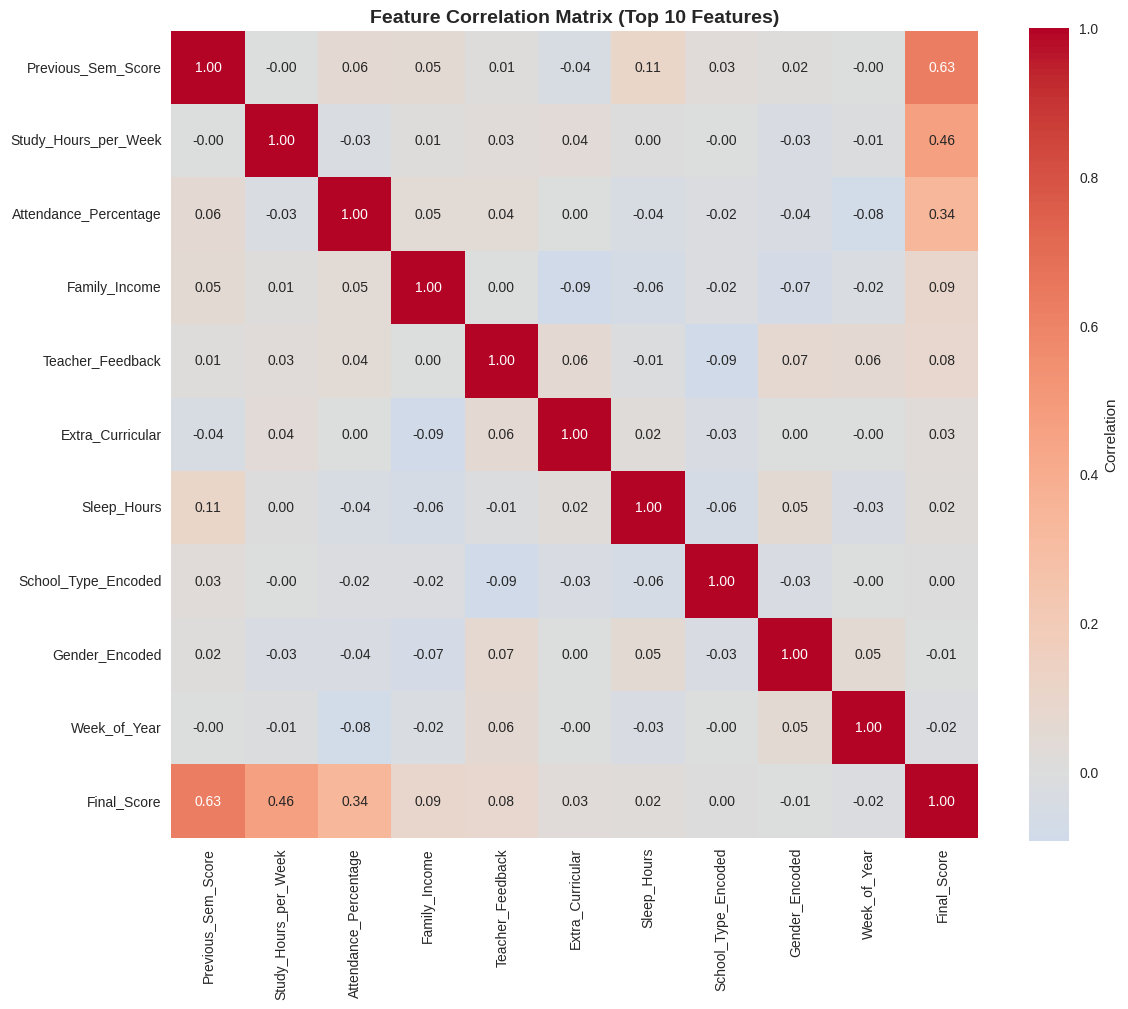

In [76]:
# Feature correlation heatmap
plt.figure(figsize=(12, 10))
important_features = correlations.head(11)[1:].index[:10]
print(f"\n🔗 Top 10 Features for Heatmap: {list(important_features)}")
corr_matrix = df[list(important_features) + ['Final_Score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix (Top 10 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [102]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


📊 Data Split:
Training set: 240 samples
Test set: 60 samples


In [101]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64'])), columns=X_train.select_dtypes(include=['int64', 'float64']).columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test.select_dtypes(include=['int64', 'float64'])), columns=X_test.select_dtypes(include=['int64', 'float64']).columns)

In [100]:
X_train_scaled

,Study_Hours_per_Week,Previous_Sem_Score,Tutoring_Classes,Extra_Curricular,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Week_of_Year,School_Type_Encoded,Parental_Education_encoded
0,0.421774,-1.294213,1.033908,1.060139,-1.451268,-1.887579,-0.062424,0.382998,-0.418702,-0.825087,-0.180154,0.982207,-1.016808,1.202231
1,-1.167845,-1.271129,1.033908,1.060139,1.691460,-0.614646,-1.730853,0.854071,-0.418702,-0.554385,0.183182,-1.045750,0.983470,1.202231
2,0.568441,0.490934,1.033908,-0.943273,1.082818,0.799536,0.765680,-0.710304,0.494830,-1.583383,-1.270164,-1.694696,-1.016808,1.202231
3,-1.575591,-0.718108,1.033908,-0.943273,0.023751,-0.543580,-0.494986,-0.447875,0.494830,-0.778187,-1.270164,0.414379,0.983470,-0.030826
4,-0.763336,1.115967,-0.967204,-0.943273,0.324333,0.723438,0.053898,-1.759285,-0.418702,-1.561240,1.273192,0.252143,0.983470,1.202231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.103767,-1.255439,-0.967204,-0.943273,-0.049361,0.296576,-0.451498,0.352150,-0.418702,0.632332,0.546519,0.414379,-1.016808,-0.030826
236,0.215881,-1.648710,-0.967204,1.060139,-1.529457,-1.709866,-0.102095,1.288957,-0.418702,1.724888,-0.543491,-0.883513,-1.016808,-1.263884
237,1.464956,-1.537745,-0.967204,1.060139,0.087142,-0.626417,1.698909,0.721604,-1.332234,0.808935,-1.270164,-0.477922,0.983470,1.202231
238,0.974028,0.759841,-0.967204,-0.943273,-1.233313,-0.412260,-1.800690,-1.768728,-0.418702,-0.201955,0.909855,1.387799,0.983470,-0.030826


In [99]:
print("✓ Features scaled using StandardScaler")

# Feature selection (optional - select top K features)
selector = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

X_test_selected = selector.transform(X_test_scaled)
selected_features = X_train_scaled.columns[selector.get_support()]

print(f"\n🎯 Feature Selection: Top {len(selected_features)} features selected")
print("Selected features:", list(selected_features))

✓ Features scaled using StandardScaler

🎯 Feature Selection: Top 14 features selected
Selected features: ['Study_Hours_per_Week', 'Previous_Sem_Score', 'Tutoring_Classes', 'Extra_Curricular', 'Sleep_Hours', 'Travel_Time', 'Test_Anxiety_Level', 'Peer_Influence', 'Teacher_Feedback', 'Motivation_Level', 'Library_Usage_per_Week', 'Week_of_Year', 'School_Type_Encoded', 'Parental_Education_encoded']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=15 is greater than n_features=14. All the features will be returned.
  warnings.warn(


In [98]:
# Create and train the linear regression model
print("\n🤖 Training Linear Regression Model:")
model = LinearRegression()
model.fit(X_train_selected, y_train)
print("✓ Model trained successfully")


🤖 Training Linear Regression Model:
✓ Model trained successfully


In [82]:
# Make predictions
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

In [83]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

print(f"\n📊 Training Set Performance:")
print(f"R² Score: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"MAPE: {mape_train:.2f}%")

train_metrics = {'R2': r2_train, 'RMSE': rmse_train, 'MAE': mae_train, 'MAPE': mape_train}


📊 Training Set Performance:
R² Score: 0.6621
RMSE: 5.80
MAE: 4.76
MAPE: 12.49%


In [97]:
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f"\n📊 Test Set Performance:")
print(f"R² Score: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"MAPE: {mape_test:.2f}%")

test_metrics = {'R2': r2_test, 'RMSE': rmse_test, 'MAE': mae_test, 'MAPE': mape_test}


📊 Test Set Performance:
R² Score: 0.4905
RMSE: 6.92
MAE: 5.53
MAPE: 13.01%


In [95]:
# Check for overfitting
print(f"\n Overfitting Check:")
print(f"R² difference (Train - Test): {train_metrics['R2'] - test_metrics['R2']:.4f}")
if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    print("✓ Model appears to generalize well (low overfitting)")
else:
    print("⚠️ Potential overfitting detected")


 Overfitting Check:
R² difference (Train - Test): 0.1716
⚠️ Potential overfitting detected


In [96]:
 #Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n🎯 Feature Importance (Top 10):")
print(feature_importance.head(10))


🎯 Feature Importance (Top 10):
                       Feature  Coefficient  Abs_Coefficient
1           Previous_Sem_Score     6.415714         6.415714
0         Study_Hours_per_Week     4.673330         4.673330
5                  Travel_Time    -0.865306         0.865306
2             Tutoring_Classes    -0.746728         0.746728
7               Peer_Influence    -0.642007         0.642007
10      Library_Usage_per_Week    -0.634733         0.634733
4                  Sleep_Hours    -0.617045         0.617045
6           Test_Anxiety_Level    -0.413638         0.413638
8             Teacher_Feedback     0.294188         0.294188
13  Parental_Education_encoded    -0.178518         0.178518


In [87]:
# Model interpretation
print(f"\n📋 Model Interpretation:")
print(f"Intercept: {model.intercept_:.2f}")


📋 Model Interpretation:
Intercept: 40.92


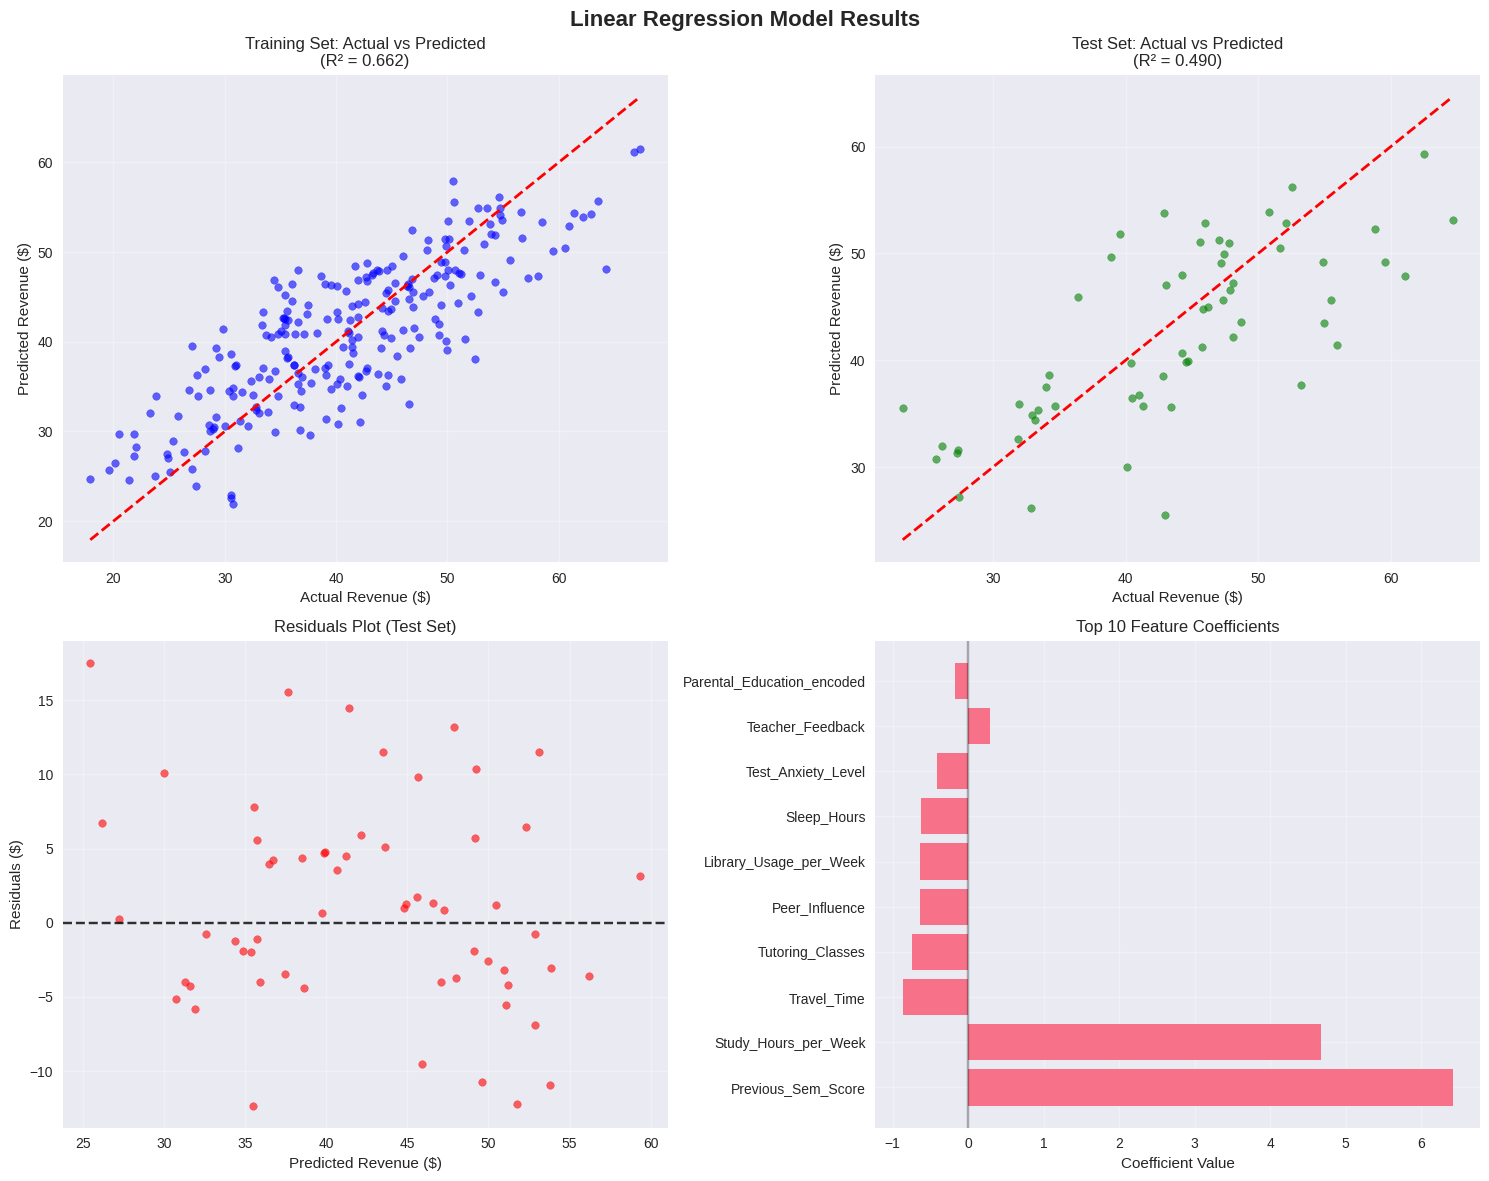

In [88]:
# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Model Results', fontsize=16, fontweight='bold')

# Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=30)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Revenue ($)')
axes[0, 0].set_ylabel('Predicted Revenue ($)')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\n(R² = {train_metrics["R2"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.6, color='green', s=30)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Revenue ($)')
axes[0, 1].set_ylabel('Predicted Revenue ($)')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\n(R² = {test_metrics["R2"]:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot
residuals_test = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.6, color='red', s=30)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted Revenue ($)')
axes[1, 0].set_ylabel('Residuals ($)')
axes[1, 0].set_title('Residuals Plot (Test Set)')
axes[1, 0].grid(True, alpha=0.3)

# Feature importance
top_features_plot = feature_importance.head(10)
axes[1, 1].barh(range(len(top_features_plot)), top_features_plot['Coefficient'])
axes[1, 1].set_yticks(range(len(top_features_plot)))
axes[1, 1].set_yticklabels(top_features_plot['Feature'])
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title('Top 10 Feature Coefficients')
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [91]:
# Example predictions
print("\n🔮 Example Predictions:")
print("-" * 40)

# Get the list of features the model was actually trained on (from X_train_scaled)
# These are the columns that StandardScaler and the model expect.
model_expected_features = X_train_scaled.columns.tolist()

# The original LabelEncoder 'le' was re-used for multiple columns, overwriting 'le.classes_'.
# To handle this correctly, we would need separate LabelEncoders or a mapping dict.
# For this example, we'll manually use common encoded values.

# Based on previous encodings and common sense:
# Tutoring_Classes: 0 for No, 1 for Yes
# Extra_Curricular: 0 for No, 1 for Yes
# Teacher_Feedback: 0:Average, 1:Excellent, 2:Good, 3:Poor (order determined by fit_transform)
# School_Type_Encoded: 0:Private, 1:Public
# Parental_Education_encoded: 0:Graduate, 1:High School, 2:Postgraduate, 3:Undergraduate

scenarios = [
    {
        'name': 'High Performing Student',
        'data': {
            'Study_Hours_per_Week': 35.0, # Corresponds to 'Hours_Studied'
            'Previous_Sem_Score': 90.0,   # Corresponds to 'Previous_Score'
            'Tutoring_Classes': 0,        # Assuming No
            'Extra_Curricular': 1,        # Assuming Yes
            'Sleep_Hours': 8.0,
            'Travel_Time': 1.5,
            'Test_Anxiety_Level': 3.0,
            'Peer_Influence': 2.0,
            'Teacher_Feedback': 1,        # Assuming Excellent
            'Motivation_Level': 9.0,
            'Library_Usage_per_Week': 5,
            'Week_of_Year': 20,           # A plausible week
            'School_Type_Encoded': 0,     # Assuming Private
            'Parental_Education_encoded': 2 # Assuming Postgraduate
        }
    },
    {
        'name': 'Average Student',
        'data': {
            'Study_Hours_per_Week': 15.0,
            'Previous_Sem_Score': 70.0,
            'Tutoring_Classes': 0,
            'Extra_Curricular': 0,
            'Sleep_Hours': 7.0,
            'Travel_Time': 2.5,
            'Test_Anxiety_Level': 5.0,
            'Peer_Influence': 5.0,
            'Teacher_Feedback': 2,        # Assuming Good
            'Motivation_Level': 6.0,
            'Library_Usage_per_Week': 3,
            'Week_of_Year': 25,
            'School_Type_Encoded': 1,     # Assuming Public
            'Parental_Education_encoded': 1 # Assuming High School
        }
    },
    {
        'name': 'Low Performing Student',
        'data': {
            'Study_Hours_per_Week': 5.0,
            'Previous_Sem_Score': 55.0,
            'Tutoring_Classes': 1,        # Assuming Yes (maybe struggling)
            'Extra_Curricular': 0,
            'Sleep_Hours': 6.0,
            'Travel_Time': 3.5,
            'Test_Anxiety_Level': 8.0,
            'Peer_Influence': 7.0,
            'Teacher_Feedback': 3,        # Assuming Poor
            'Motivation_Level': 3.0,
            'Library_Usage_per_Week': 1,
            'Week_of_Year': 30,
            'School_Type_Encoded': 1,
            'Parental_Education_encoded': 0 # Assuming Graduate
        }
    }
]

for scenario in scenarios:
    # Create a DataFrame for the sample, ensuring correct column names and order
    sample_df = pd.DataFrame([scenario['data']], columns=model_expected_features)


    sample_scaled_array = scaler.transform(sample_df)

    sample_scaled_df = pd.DataFrame(sample_scaled_array, columns=model_expected_features)

    # Feature selection (if used) - now with feature names
    sample_selected = selector.transform(sample_scaled_df)

    # Prediction
    prediction = model.predict(sample_selected)

    print(f"{scenario['name']} ➜ Predicted Final Score: {prediction[0]:.2f}")


🔮 Example Predictions:
----------------------------------------
High Performing Student ➜ Predicted Final Score: 57.17
Average Student ➜ Predicted Final Score: 41.33
Low Performing Student ➜ Predicted Final Score: 30.28


In [92]:
print(f"\n📊 Model Summary:")
print(f"✓ Model successfully trained on {len(X_train)} samples")
print(f"✓ Test R² Score: {test_metrics['R2']:.4f}")
print(f"✓ Test RMSE: {test_metrics['RMSE']:.2f}")
print(f"✓ Model can predict student final score with {test_metrics['R2']*100:.1f}% accuracy")
print(f"✓ Most important factor: {feature_importance.iloc[0]['Feature']}")


📊 Model Summary:
✓ Model successfully trained on 240 samples
✓ Test R² Score: 0.4905
✓ Test RMSE: 6.92
✓ Model can predict student final score with 49.0% accuracy
✓ Most important factor: Previous_Sem_Score


In [94]:
import joblib
joblib.dump(model,'Task_students_performance_dataset.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(selector,'feature_selector.pkl')
print("✅ Model, scaler, and selector saved successfully!")

✅ Model, scaler, and selector saved successfully!
